In [18]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [8]:
df = pd.read_csv('../Data/Iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [44]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Hasil Evaluasi Model")
print(f"Akurasi Model: {accuracy*100:.2f}%")

print("Classification Report")
print(classification_report(y_test, y_pred))

Hasil Evaluasi Model
Akurasi Model: 96.67%
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



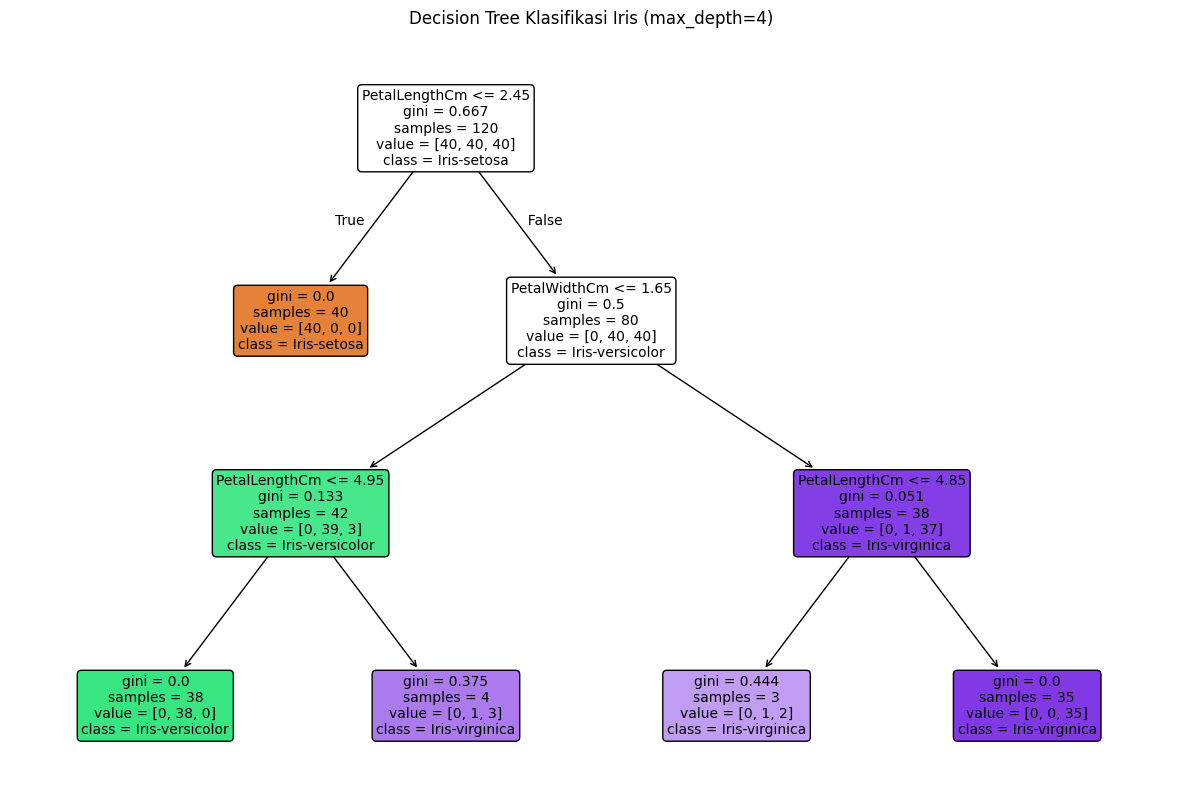

In [38]:
plt.figure(figsize=(15, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=dt_model.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Klasifikasi Iris (max_depth=4)")
plt.show()

Feature Importance
PetalLengthCm    0.579077
PetalWidthCm     0.420923
SepalWidthCm     0.000000
SepalLengthCm    0.000000
dtype: float64


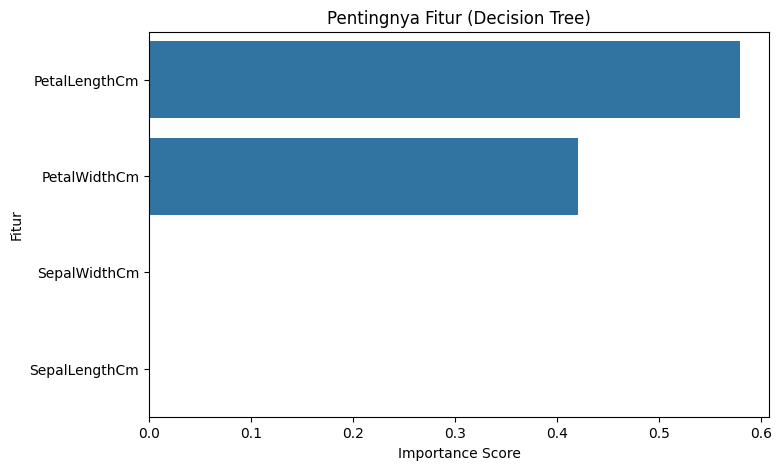

In [41]:
importance = pd.Series(
    dt_model.feature_importances_, 
    index=X.columns
).sort_values(ascending=False)

print("Feature Importance")
print(importance)

# Visualisasi Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=importance.values, y=importance.index)
plt.title("Pentingnya Fitur (Decision Tree)")
plt.xlabel("Importance Score")
plt.ylabel("Fitur")
plt.show()